In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../dataset/extracted_data.csv")

In [4]:
df.head()

,client_id,fam,ism,sharif,pseriya,praqam,pnfl,phone1,phone2,birth_date,...,salary_client_sorovnoma_oilas.xlsx,ish_status,oila_status,oila_azo_soni,home_type,home_type.1,home_owner,main_xarajat,narxi,summa
0,3,Imomnazarov,Islomjon,Ramishjon o'g'li,AC,2507350,52112017050022,951552128.0,NaN,2001-12-21,...,6000000.0,1.0,2,5,2.0,2.0,1.0,1200000,15930000.0,15930000.0
1,4,Meliqo`ziyeva,Muslimaxon,Farxodjon qizi,AA,8312668,40207954320028,912056205.0,NaN,1995-02-07,...,3500000.0,1.0,1,7,1.0,1.0,1.0,3500000,5309000.0,5309000.0
2,5,Asqarova,Dilshoda,Ergashevna,AC,2979026,40307864230038,905674009.0,NaN,1986-07-03,...,2500000.0,1.0,2,3,2.0,2.0,1.0,1000000,6708000.0,6708000.0
3,6,Nosirov,Azizbek,Kozimjon O'g'li,AB,1732823,31406914250018,932141491.0,NaN,1991-06-14,...,9000000.0,1.0,1,6,1.0,1.0,1.0,2400000,984256.0,984256.0
4,7,Akramov,Alixon,Akbarovich,AA,6311205,30503774320086,905568080.0,NaN,1977-03-05,...,3000000.0,1.0,1,6,1.0,1.0,1.0,2400000,370000.0,370000.0


In [5]:
df.columns

Index(['client_id', 'fam', 'ism', 'sharif', 'pseriya', 'praqam', 'pnfl',
       'phone1', 'phone2', 'birth_date', 'jins', 'viloyat_id', 'tuman_id',
       'mfy_id', 'client_status', 'status',
       'work_type_client_sorovnoma_finances.xlsx',
       'kasb_client_sorovnoma_finances.xlsx',
       'work_place_phone_client_sorovnoma_finances.xlsx',
       'work_place_phone_owner_client_sorovnoma_finances.xlsx',
       'lavozim_client_sorovnoma_finances.xlsx',
       'salary_client_sorovnoma_finances.xlsx', 'ish_faoliyat',
       'salary_client_sorovnoma_oilas.xlsx', 'ish_status', 'oila_status',
       'oila_azo_soni', 'home_type', 'home_type.1', 'home_owner',
       'main_xarajat', 'narxi', 'summa'],
      dtype='object')

In [6]:
df.rename(columns={
    'fam': 'surname',
    'ism': 'first_name', 
    'sharif': 'middle_name',
    'preriya': 'passport_seria',
    'praqam': 'passport_number',
    'jins': 'sex',
    'client_status': 'client_type',
    'work_type_client_sorovnoma_finances.xlsx': 'work_type_name',
    'kasb_client_sorovnoma_finances.xlsx': 'job_name',
    'work_place_phone_client_sorovnoma_finances.xlsx': 'work_place_phone_client', 
    'work_place_phone_owner_client_sorovnoma_finances.xlsx': 'work_place_phone_client_owner',
    'lavozim_client_sorovnoma_finances.xlsx':'occupation1',
    'salary_client_sorovnoma_finances.xlsx': 'salary',
    'ish_faoliyat': 'occupation2', 
    'salary_client_sorovnoma_oilas.xlsx':'total_client_family_salary',
    'ish_status': 'occupation_status',
    'oila_status': 'family_status',
    'oila_azo_soni': 'family_members_count',
    'main_xarajat': 'client_monthly_expenditure',
    'narxi': 'product_price',
    'summa': 'final_produt_price'}, inplace=True)
    

In [7]:
df = df.drop(['home_type.1'], axis=1)

In [8]:
df.columns

Index(['client_id', 'surname', 'first_name', 'middle_name', 'pseriya',
       'passport_number', 'pnfl', 'phone1', 'phone2', 'birth_date', 'sex',
       'viloyat_id', 'tuman_id', 'mfy_id', 'client_type', 'status',
       'work_type_name', 'job_name', 'work_place_phone_client',
       'work_place_phone_client_owner', 'occupation1', 'salary', 'occupation2',
       'total_client_family_salary', 'occupation_status', 'family_status',
       'family_members_count', 'home_type', 'home_owner',
       'client_monthly_expenditure', 'product_price', 'final_produt_price'],
      dtype='object')

In [9]:
df.describe()

,client_id,passport_number,pnfl,phone1,sex,viloyat_id,tuman_id,mfy_id,client_type,work_type_name,job_name,salary,total_client_family_salary,occupation_status,family_status,home_type,home_owner,product_price,final_produt_price
count,6566.000000,6.566000e+03,6.566000e+03,6.548000e+03,6566.000000,6566.000000,6566.000000,6566.000000,6553.000000,6540.000000,6540.000000,6.415000e+03,6.432000e+03,6563.000000,6566.000000,6542.000000,6541.000000,6.531000e+03,6.531000e+03
mean,3474.005330,4.986425e+06,3.835835e+13,1.536730e+10,1.392324,6.282516,85.935120,5886.483399,1.368991,3.022018,120.236850,4.508692e+06,5.279406e+06,1.034131,1.075541,1.173341,1.009479,5.898935e+06,5.832221e+06
std,1994.760187,2.896489e+06,9.114945e+12,1.118730e+12,0.488305,1.394087,21.087604,503.068647,0.482568,1.614510,156.174821,1.670578e+07,8.728602e+07,0.181579,0.264282,0.378571,0.096903,6.899639e+06,5.129116e+06
min,3.000000,-1.000000e+00,0.000000e+00,2.073738e+06,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,4.266912e+00
25%,1749.500000,2.393172e+06,3.160478e+13,9.036676e+08,1.000000,6.000000,76.000000,5787.000000,1.000000,2.000000,1.000000,2.000000e+06,2.500000e+06,1.000000,1.000000,1.000000,1.000000,2.831000e+06,2.847000e+06
50%,3475.500000,5.186916e+06,4.020776e+13,9.114301e+08,1.000000,6.000000,80.000000,5957.000000,1.000000,2.000000,21.000000,4.000000e+06,4.000000e+06,1.000000,1.000000,1.000000,1.000000,4.203000e+06,4.248000e+06
75%,5210.750000,7.627534e+06,4.230291e+13,9.174979e+08,2.000000,6.000000,90.000000,6079.000000,2.000000,4.000000,276.000000,5.000000e+06,5.000000e+06,1.000000,1.000000,1.000000,1.000000,7.250000e+06,7.300000e+06
max,6906.000000,9.993085e+06,9.552108e+13,9.050677e+13,2.000000,14.000000,199.000000,6238.000000,2.000000,9.000000,423.000000,9.168854e+08,7.000000e+09,2.000000,2.000000,2.000000,2.000000,2.230000e+08,1.389600e+08


In [10]:
df.isna()

,client_id,surname,first_name,middle_name,pseriya,passport_number,pnfl,phone1,phone2,birth_date,...,occupation2,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

client_id                          0
surname                            0
first_name                         0
middle_name                        0
pseriya                            0
passport_number                    0
pnfl                               0
phone1                            18
phone2                           189
birth_date                         0
sex                                0
viloyat_id                         0
tuman_id                           0
mfy_id                             0
client_type                       13
status                             0
work_type_name                    26
job_name                          26
work_place_phone_client           27
work_place_phone_client_owner     26
occupation1                       27
salary                           151
occupation2                       30
total_client_family_salary       134
occupation_status                  3
family_status                      0
family_members_count              17
h

In [12]:
df["status"].value_counts()

Yakunlandi                  4388
Monitoring bekor qildi      1080
Komitet bekor qildi          921
Bekor qilindi                116
1                             38
5                             13
Komitet ko'rib chiqmoqda      10
Name: status, dtype: int64

In [13]:
len(df)

6566

FILLING EMPTY COLUMNS


In [14]:
df['phone1'] = df['phone1'].fillna(df['phone2'])

In [15]:
df = df.drop(['phone2'], axis=1)

In [16]:
df['client_type'] = df['client_type'].fillna(df['status'].apply(lambda x: 1 if x == 'Yakunlandi' else 2))

In [17]:
df['work_type_name'].head()

0    2.0
1    3.0
2    2.0
3    5.0
4    2.0
Name: work_type_name, dtype: float64

In [18]:
most_common_work_type_name = df['work_type_name'].mode()[0]
df['work_type_name'] = df['work_type_name'].fillna(most_common_work_type_name)

In [19]:
df['job_name'].head()

0     40.0
1    388.0
2    137.0
3    196.0
4     21.0
Name: job_name, dtype: float64

In [20]:
most_common_work_job_name = df['job_name'].mode()[0]
df['job_name'] = df['job_name'].fillna(most_common_work_job_name)

In [21]:
df['work_place_phone_client'] = df['work_place_phone_client'].fillna(df['work_place_phone_client_owner'])
df['work_place_phone_client_owner'] = df['work_place_phone_client_owner'].fillna(df['work_place_phone_client'])

In [22]:
df['occupation1'] = df['occupation1'].fillna(df['occupation2'])
df['occupation2'] = df['occupation2'].fillna(df['occupation1'])

In [23]:
df['salary'] = df['salary'].fillna(df['salary'].mean())

In [24]:
df['total_client_family_salary'] = df['total_client_family_salary'].fillna(df['total_client_family_salary'].mean())

In [25]:
df['occupation_status'] = df['occupation_status'].fillna(1)

In [26]:
df['home_owner'] = df['home_owner'].fillna(df['home_type']) 

In [27]:
# Convert the column to numeric, coercing errors to NaN
df['client_monthly_expenditure'] = pd.to_numeric(df['client_monthly_expenditure'], errors='coerce')

# Fill missing values with the column mean
df['client_monthly_expenditure'] = df['client_monthly_expenditure'].fillna(df['client_monthly_expenditure'].mean())

In [28]:
print(df['client_monthly_expenditure'].dtype)

float64


In [29]:
df['product_price'] = df['product_price'].fillna(df['product_price'].mean())
df['final_produt_price'] = df['final_produt_price'].fillna(df['final_produt_price'].mean())

In [30]:
df.isnull().sum()

client_id                         0
surname                           0
first_name                        0
middle_name                       0
pseriya                           0
passport_number                   0
pnfl                              0
phone1                            6
birth_date                        0
sex                               0
viloyat_id                        0
tuman_id                          0
mfy_id                            0
client_type                       0
status                            0
work_type_name                    0
job_name                          0
work_place_phone_client          26
work_place_phone_client_owner    26
occupation1                       0
salary                            0
occupation2                       0
total_client_family_salary        0
occupation_status                 0
family_status                     0
family_members_count             17
home_type                        24
home_owner                  

In [31]:
#lowest freq
least_common_value = df['work_place_phone_client'].value_counts().idxmin()
df['work_place_phone_client'] = df['work_place_phone_client'].fillna(least_common_value)

In [32]:
#lowest freq
most_common_value = df['work_place_phone_client_owner'].value_counts().idxmax()
df['work_place_phone_client_owner'] = df['work_place_phone_client_owner'].fillna(most_common_value)

In [33]:
#lowest freq
most_common_value_phone = df['phone1'].value_counts().idxmax()
df['phone1'] = df['phone1'].fillna(most_common_value_phone)

In [34]:
#lowest freq
less_common_value_home = df['home_owner'].value_counts().idxmin()
df['home_owner'] = df['home_owner'].fillna(less_common_value_home)

In [35]:
df.isnull().sum()

client_id                         0
surname                           0
first_name                        0
middle_name                       0
pseriya                           0
passport_number                   0
pnfl                              0
phone1                            0
birth_date                        0
sex                               0
viloyat_id                        0
tuman_id                          0
mfy_id                            0
client_type                       0
status                            0
work_type_name                    0
job_name                          0
work_place_phone_client           0
work_place_phone_client_owner     0
occupation1                       0
salary                            0
occupation2                       0
total_client_family_salary        0
occupation_status                 0
family_status                     0
family_members_count             17
home_type                        24
home_owner                  

In [36]:
df.isna()

,client_id,surname,first_name,middle_name,pseriya,passport_number,pnfl,phone1,birth_date,sex,...,occupation2,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df.head()

,client_id,surname,first_name,middle_name,pseriya,passport_number,pnfl,phone1,birth_date,sex,...,occupation2,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3,Imomnazarov,Islomjon,Ramishjon o'g'li,AC,2507350,52112017050022,951552128.0,2001-12-21,1,...,Tadbirkor,6000000.0,1.0,2,5,2.0,1.0,1200000.0,15930000.0,15930000.0
1,4,Meliqo`ziyeva,Muslimaxon,Farxodjon qizi,AA,8312668,40207954320028,912056205.0,1995-02-07,2,...,Xaydovchi,3500000.0,1.0,1,7,1.0,1.0,3500000.0,5309000.0,5309000.0
2,5,Asqarova,Dilshoda,Ergashevna,AC,2979026,40307864230038,905674009.0,1986-07-03,2,...,????,2500000.0,1.0,2,3,2.0,1.0,1000000.0,6708000.0,6708000.0
3,6,Nosirov,Azizbek,Kozimjon O'g'li,AB,1732823,31406914250018,932141491.0,1991-06-14,1,...,Xarbiy,9000000.0,1.0,1,6,1.0,1.0,2400000.0,984256.0,984256.0
4,7,Akramov,Alixon,Akbarovich,AA,6311205,30503774320086,905568080.0,1977-03-05,1,...,Taksis,3000000.0,1.0,1,6,1.0,1.0,2400000.0,370000.0,370000.0


In [38]:
df.columns

Index(['client_id', 'surname', 'first_name', 'middle_name', 'pseriya',
       'passport_number', 'pnfl', 'phone1', 'birth_date', 'sex', 'viloyat_id',
       'tuman_id', 'mfy_id', 'client_type', 'status', 'work_type_name',
       'job_name', 'work_place_phone_client', 'work_place_phone_client_owner',
       'occupation1', 'salary', 'occupation2', 'total_client_family_salary',
       'occupation_status', 'family_status', 'family_members_count',
       'home_type', 'home_owner', 'client_monthly_expenditure',
       'product_price', 'final_produt_price'],
      dtype='object')

In [39]:
df['status'].value_counts()


Yakunlandi                  4388
Monitoring bekor qildi      1080
Komitet bekor qildi          921
Bekor qilindi                116
1                             38
5                             13
Komitet ko'rib chiqmoqda      10
Name: status, dtype: int64

In [40]:
df[['viloyat_id', 'tuman_id', 'mfy_id']]

,viloyat_id,tuman_id,mfy_id
0,6,76,5748
1,6,90,6079
2,6,76,5769
3,6,90,6065
4,6,90,6167
...,...,...,...
6561,6,76,5792
6562,13,183,5110
6563,6,76,5808
6564,6,80,5964


In [41]:
df[['work_type_name', 'job_name', 'occupation1']]

,work_type_name,job_name,occupation1
0,2.0,40.0,Tadbirkor
1,3.0,388.0,-
2,2.0,137.0,???
3,5.0,196.0,Xarbiy
4,2.0,21.0,Taksis
...,...,...,...
6561,3.0,1.0,Uy bekasi
6562,5.0,327.0,Tarbiyachi
6563,4.0,1.0,Nafaqa
6564,4.0,332.0,1111


In [42]:
a = df[["client_id", "sex", "viloyat_id", "tuman_id", "mfy_id", "client_type", "status", "job_name", "salary", "total_client_family_salary", "occupation_status", "family_status", "family_members_count","home_type", "home_owner", "client_monthly_expenditure", "product_price", "final_produt_price"]]
a

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,status,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3,1,6,76,5748,1.0,Monitoring bekor qildi,40.0,6.000000e+06,6.000000e+06,1.0,2,5,2.0,1.0,1200000.0,15930000.0,15930000.0
1,4,2,6,90,6079,1.0,Yakunlandi,388.0,4.508692e+06,3.500000e+06,1.0,1,7,1.0,1.0,3500000.0,5309000.0,5309000.0
2,5,2,6,76,5769,1.0,Yakunlandi,137.0,4.000000e+06,2.500000e+06,1.0,2,3,2.0,1.0,1000000.0,6708000.0,6708000.0
3,6,1,6,90,6065,2.0,Yakunlandi,196.0,9.000000e+06,9.000000e+06,1.0,1,6,1.0,1.0,2400000.0,984256.0,984256.0
4,7,1,6,90,6167,1.0,Yakunlandi,21.0,3.000000e+06,3.000000e+06,1.0,1,6,1.0,1.0,2400000.0,370000.0,370000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,6902,2,6,76,5792,1.0,Yakunlandi,1.0,1.234560e+05,5.279406e+06,1.0,1,6,1.0,1.0,2400000.0,2736000.0,2736000.0
6562,6903,2,13,183,5110,1.0,Monitoring bekor qildi,327.0,1.500000e+06,1.500000e+06,1.0,1,7,1.0,1.0,2800000.0,6732000.0,6732000.0
6563,6904,2,6,76,5808,2.0,Yakunlandi,1.0,2.500000e+06,2.500000e+06,1.0,1,6,2.0,1.0,3000000.0,1380000.0,1380000.0
6564,6905,2,6,80,5964,2.0,1,332.0,1.230000e+02,7.500000e+05,1.0,1,5,1.0,1.0,2500000.0,7152000.0,7152000.0


In [43]:
a['status'].value_counts()

Yakunlandi                  4388
Monitoring bekor qildi      1080
Komitet bekor qildi          921
Bekor qilindi                116
1                             38
5                             13
Komitet ko'rib chiqmoqda      10
Name: status, dtype: int64

yakunlandi -> 1 remaining ->0

In [44]:
a["status"] = a["status"].replace({"Yakunlandi": 0, "Monitoring bekor qildi": 1, "Komitet bekor qildi": 1, "Bekor qilindi": 1, "1":1, "5":1, "Komitet ko'rib chiqmoqda":1}).fillna(0)

/tmp/ipykernel_14147/2497396595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["status"] = a["status"].replace({"Yakunlandi": 0, "Monitoring bekor qildi": 1, "Komitet bekor qildi": 1, "Bekor qilindi": 1, "1":1, "5":1, "Komitet ko'rib chiqmoqda":1}).fillna(0)


In [45]:
a['status'].value_counts()

0    4388
1    2178
Name: status, dtype: int64

In [46]:
df_jobs = pd.read_csv("../dataset/jobs.csv")

In [47]:
df_jobs.head()

,id,jobs
0,1,ish lavozimi
1,2,polkovnik
2,3,podpolkovnik
3,4,mayor
4,5,kapitan


In [48]:
job_mapping = df_jobs.set_index('id')['jobs'].to_dict()

In [49]:
job_mapping

{1: 'ish lavozimi',
 2: 'polkovnik',
 3: 'podpolkovnik',
 4: 'mayor',
 5: 'kapitan',
 6: 'inspektor',
 7: 'katta leytenant',
 8: 'kichik leytenant',
 9: 'inspektor yordamchisi',
 10: 'starshina',
 11: 'safdor',
 12: 'soxchi',
 13: 'brigadir',
 14: 'rektor',
 15: 'prorektor',
 16: 'dekan',
 17: 'zam dekan',
 18: 'kafedra mudiri',
 19: 'chilangar',
 20: 'elektrik',
 21: 'xaydovchi',
 22: 'mashinist',
 23: 'katta xamshira',
 24: 'kichik xamshira',
 25: 'sanitarka',
 26: 'sanitar',
 27: 'lor',
 28: 'travmatolog',
 29: 'urolog',
 30: 'ginekolog',
 31: 'xirurg (jarrox)',
 32: 'nevropatolog',
 33: 'xujalik mudiri',
 34: 'kassir',
 35: 'xokim yordamchisi',
 36: 'zam xokim',
 37: 'bogbon',
 38: 'аxborot kommunikatsiya xodimi',
 39: 'tadbirkorlik bulimi boshligi',
 40: 'tadbirkorlik bulim mutaxassisi',
 41: 'xotin kizlar jamgarmasi boʼlimi',
 42: 'sektor raxbari',
 43: 'yoshlar bilan ishlash bulimi xodimi',
 44: 'iktisod bulimi xodimi',
 45: 'filial raxbari',
 46: 'iktisodiy masalalar urinbosari

In [50]:
a['job_name'] = a['job_name'].map(job_mapping)

/tmp/ipykernel_14147/785006323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['job_name'] = a['job_name'].map(job_mapping)


In [51]:
a.head()

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,status,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3,1,6,76,5748,1.0,1,tadbirkorlik bulim mutaxassisi,6.000000e+06,6000000.0,1.0,2,5,2.0,1.0,1200000.0,15930000.0,15930000.0
1,4,2,6,90,6079,1.0,0,uy bekasi,4.508692e+06,3500000.0,1.0,1,7,1.0,1.0,3500000.0,5309000.0,5309000.0
2,5,2,6,76,5769,1.0,0,oddiy ishchi,4.000000e+06,2500000.0,1.0,2,3,2.0,1.0,1000000.0,6708000.0,6708000.0
3,6,1,6,90,6065,2.0,0,muddatli xarbiy xizmat bulimi xodimi,9.000000e+06,9000000.0,1.0,1,6,1.0,1.0,2400000.0,984256.0,984256.0
4,7,1,6,90,6167,1.0,0,xaydovchi,3.000000e+06,3000000.0,1.0,1,6,1.0,1.0,2400000.0,370000.0,370000.0


In [53]:
import matplotlib.pyplot as plt

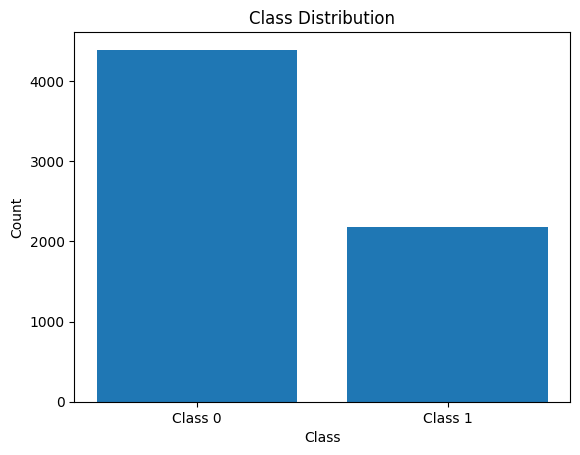

In [54]:
x = a.drop(["status"],axis=1)
y = a["status"]

count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

In [55]:
obj_df = a.select_dtypes(include=['object']).copy()

In [56]:
obj_df.head()

,job_name,family_members_count
0,tadbirkorlik bulim mutaxassisi,5
1,uy bekasi,7
2,oddiy ishchi,3
3,muddatli xarbiy xizmat bulimi xodimi,6
4,xaydovchi,6


In [57]:
def find_unique(col):
  print(col,":",obj_df[col].unique())
for col in obj_df.columns:
  find_unique(col)

job_name : ['tadbirkorlik bulim mutaxassisi' 'uy bekasi' 'oddiy ishchi'
 'muddatli xarbiy xizmat bulimi xodimi' 'xaydovchi' 'oshxona'
 'kiyim-kechak sotuvchi' 'moyka-ximchistka'
 'yoshlar bilan ishlash bulimi xodimi' 'dexkon' 'zavxoz' 'paypok sex'
 'yollanma ishchi' 'ukituvchi' 'kurilish mollari' 'santexnik' 'motor'
 'usta' 'kuylak tikuvchi' 'ijrochi xodim' 'podpolkovnik'
 'loyixachi bulimi xodimi' 'boshkaruvchi' 'kassir' 'katta xamshira'
 'mayor' 'dekan' 'soxchi' 'brigadir' 'texnik kurik nazoratchi xodimi'
 'chevar' 'tarbiyachi' 'ish lavozimi' 'bosh xisobchi' 'mashinist' nan
 'master' 'bolalar' 'pojarnыy xodim' 'moy almashtiruvchi' 'zam xokim'
 'polkovnik' 'kosib' 'tadbirkorlik bulimi boshligi' 'safdor' 'nogironlar'
 'ish yurituvchi' 'nonvoy' 'chilangar santexnik usta' 'xisobchi' 'yurist'
 'enaga' 'bogbon' 'savdogar' 'xususiy bank' 'liniyada katnovchi'
 'zam direktor' 'mashina sotuvchi' 'ichimlik suvi bulimi xodimi'
 'maishiy texnika ustasi' 'omborchi' 'pishirik tort' 'uzi'
 'аxborot 

In [58]:
obj_df.nunique()

job_name                223
family_members_count     19
dtype: int64

In [59]:
a['family_members_count'] = pd.to_numeric(a['family_members_count'], errors='coerce')

/tmp/ipykernel_14147/2306518429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['family_members_count'] = pd.to_numeric(a['family_members_count'], errors='coerce')


In [60]:
a['family_members_count'].dtype

dtype('float64')

In [61]:
obj_df=a.select_dtypes(include=['object']).copy()

In [62]:
# shuffle the DataFrame rows
selected = a.sample(frac = 1)

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
# encode the categorical values into numeric values
le=LabelEncoder()
for col in obj_df.columns:
    a[col]=le.fit_transform(a[col])
a.head()

/tmp/ipykernel_14147/3959975705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[col]=le.fit_transform(a[col])


,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,status,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3,1,6,76,5748,1.0,1,164,6.000000e+06,6000000.0,1.0,2,5.0,2.0,1.0,1200000.0,15930000.0,15930000.0
1,4,2,6,90,6079,1.0,0,185,4.508692e+06,3500000.0,1.0,1,7.0,1.0,1.0,3500000.0,5309000.0,5309000.0
2,5,2,6,76,5769,1.0,0,120,4.000000e+06,2500000.0,1.0,2,3.0,2.0,1.0,1000000.0,6708000.0,6708000.0
3,6,1,6,90,6065,2.0,0,109,9.000000e+06,9000000.0,1.0,1,6.0,1.0,1.0,2400000.0,984256.0,984256.0
4,7,1,6,90,6167,1.0,0,194,3.000000e+06,3000000.0,1.0,1,6.0,1.0,1.0,2400000.0,370000.0,370000.0


In [65]:
a.reset_index(inplace=True)
a.head()

,index,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,status,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,0,3,1,6,76,5748,1.0,1,164,6.000000e+06,6000000.0,1.0,2,5.0,2.0,1.0,1200000.0,15930000.0,15930000.0
1,1,4,2,6,90,6079,1.0,0,185,4.508692e+06,3500000.0,1.0,1,7.0,1.0,1.0,3500000.0,5309000.0,5309000.0
2,2,5,2,6,76,5769,1.0,0,120,4.000000e+06,2500000.0,1.0,2,3.0,2.0,1.0,1000000.0,6708000.0,6708000.0
3,3,6,1,6,90,6065,2.0,0,109,9.000000e+06,9000000.0,1.0,1,6.0,1.0,1.0,2400000.0,984256.0,984256.0
4,4,7,1,6,90,6167,1.0,0,194,3.000000e+06,3000000.0,1.0,1,6.0,1.0,1.0,2400000.0,370000.0,370000.0


In [66]:
len(a)

6566

In [67]:
a=a.drop(columns=["index"],axis=1)
a.head()

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,status,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3,1,6,76,5748,1.0,1,164,6.000000e+06,6000000.0,1.0,2,5.0,2.0,1.0,1200000.0,15930000.0,15930000.0
1,4,2,6,90,6079,1.0,0,185,4.508692e+06,3500000.0,1.0,1,7.0,1.0,1.0,3500000.0,5309000.0,5309000.0
2,5,2,6,76,5769,1.0,0,120,4.000000e+06,2500000.0,1.0,2,3.0,2.0,1.0,1000000.0,6708000.0,6708000.0
3,6,1,6,90,6065,2.0,0,109,9.000000e+06,9000000.0,1.0,1,6.0,1.0,1.0,2400000.0,984256.0,984256.0
4,7,1,6,90,6167,1.0,0,194,3.000000e+06,3000000.0,1.0,1,6.0,1.0,1.0,2400000.0,370000.0,370000.0


Data Correlation


In [68]:
import seaborn as sns

<Axes: >

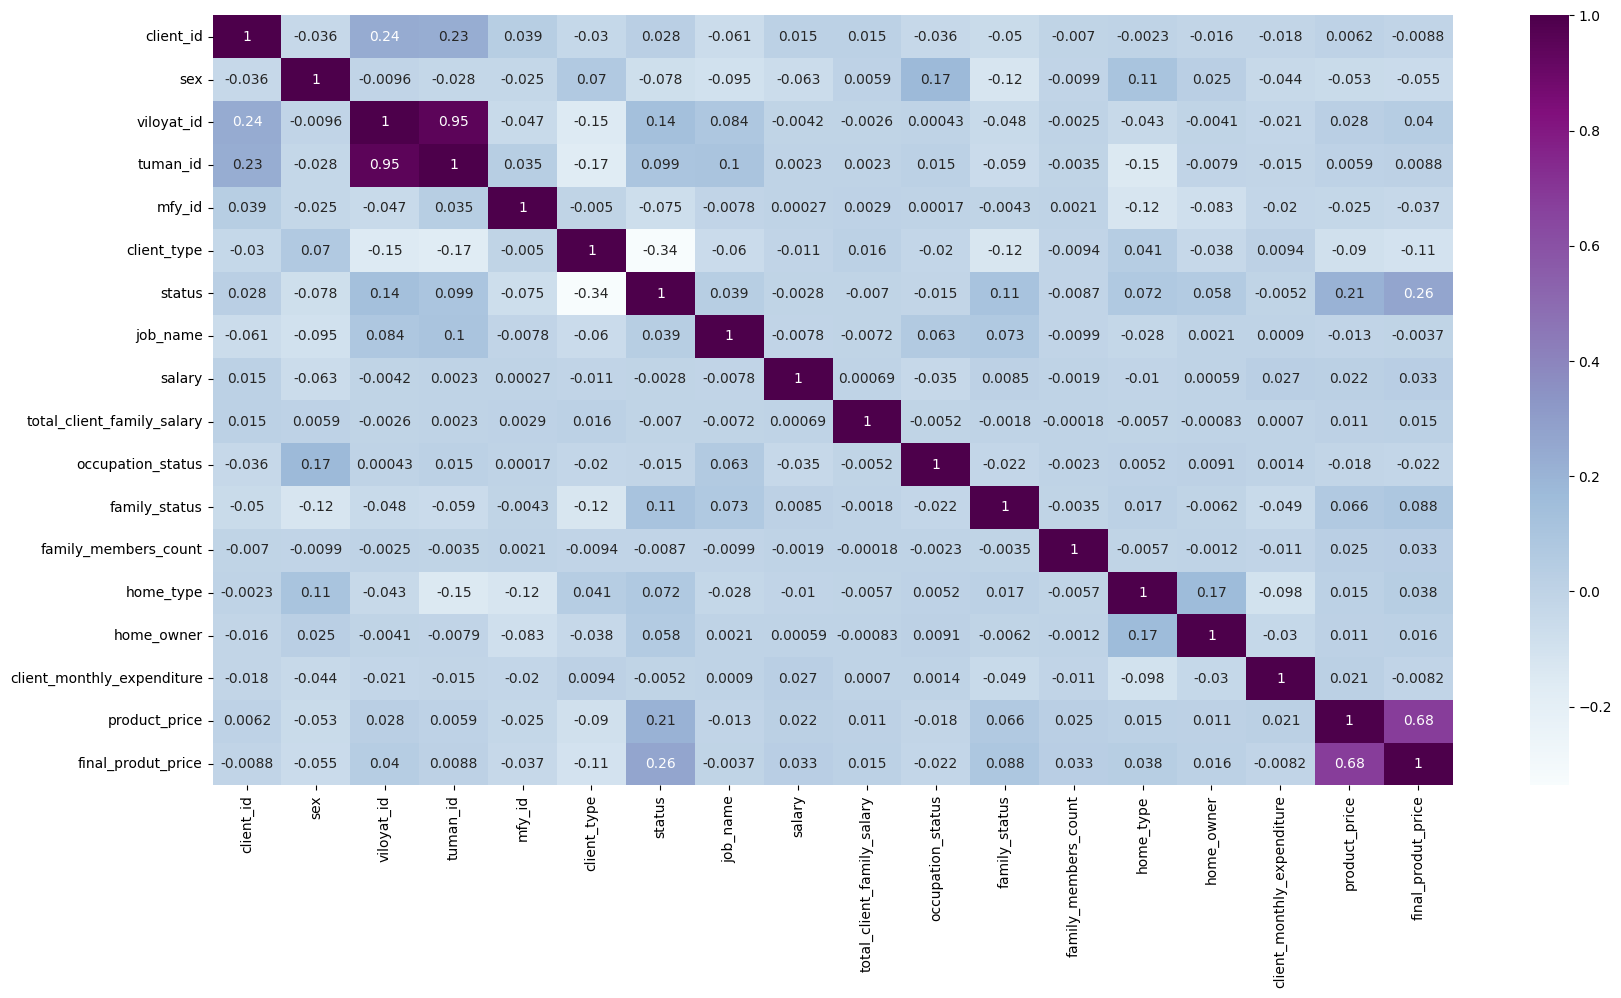

In [69]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=a.corr()
sns.heatmap(corn,annot=True,cmap="BuPu")

In [68]:
# from sklearn.preprocessing import StandardScaler
# import re

In [70]:
a.head()

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,status,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3,1,6,76,5748,1.0,1,164,6.000000e+06,6000000.0,1.0,2,5.0,2.0,1.0,1200000.0,15930000.0,15930000.0
1,4,2,6,90,6079,1.0,0,185,4.508692e+06,3500000.0,1.0,1,7.0,1.0,1.0,3500000.0,5309000.0,5309000.0
2,5,2,6,76,5769,1.0,0,120,4.000000e+06,2500000.0,1.0,2,3.0,2.0,1.0,1000000.0,6708000.0,6708000.0
3,6,1,6,90,6065,2.0,0,109,9.000000e+06,9000000.0,1.0,1,6.0,1.0,1.0,2400000.0,984256.0,984256.0
4,7,1,6,90,6167,1.0,0,194,3.000000e+06,3000000.0,1.0,1,6.0,1.0,1.0,2400000.0,370000.0,370000.0


In [71]:
a.dtypes

client_id                       int64
sex                             int64
viloyat_id                      int64
tuman_id                        int64
mfy_id                          int64
client_type                   float64
status                          int64
job_name                        int64
salary                        float64
total_client_family_salary    float64
occupation_status             float64
family_status                   int64
family_members_count          float64
home_type                     float64
home_owner                    float64
client_monthly_expenditure    float64
product_price                 float64
final_produt_price            float64
dtype: object

In [72]:
# Drop client_id (not useful for training)
df_numeric = a.drop(columns=['client_id'])

In [73]:
for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':  # Check object columns
        print(f"Column {col} unique values: {df_numeric[col].unique()}")

In [74]:
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')  # Convert to numbers
print(df_numeric.isna().sum())  # Check if any NaN values were introduced


sex                            0
viloyat_id                     0
tuman_id                       0
mfy_id                         0
client_type                    0
status                         0
job_name                       0
salary                         0
total_client_family_salary     0
occupation_status              0
family_status                  0
family_members_count          21
home_type                     24
home_owner                     0
client_monthly_expenditure     0
product_price                  0
final_produt_price             0
dtype: int64


In [75]:
df_numeric = df_numeric.fillna(df_numeric.mean())

In [76]:
df_numeric.dtypes

sex                             int64
viloyat_id                      int64
tuman_id                        int64
mfy_id                          int64
client_type                   float64
status                          int64
job_name                        int64
salary                        float64
total_client_family_salary    float64
occupation_status             float64
family_status                   int64
family_members_count          float64
home_type                     float64
home_owner                    float64
client_monthly_expenditure    float64
product_price                 float64
final_produt_price            float64
dtype: object

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
X = df_numeric.drop(columns=['status'])
y = df_numeric['status']     

In [79]:
y = y.astype(int)

In [80]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [81]:
print(y_resampled.value_counts()) 

1    4388
0    4388
Name: status, dtype: int64


In [82]:
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['status'] = y_resampled

In [83]:
print(df_balanced['status'].value_counts())  # Check balance

1    4388
0    4388
Name: status, dtype: int64


In [84]:
df_balanced['status'].value_counts()

1    4388
0    4388
Name: status, dtype: int64

In [85]:
df_balanced.head()

,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price,status
0,1,6,76,5748,1.0,164,6.000000e+06,6000000.0,1.0,2,5.0,2.0,1.0,1200000.0,15930000.0,15930000.0,1
1,2,6,90,6079,1.0,185,4.508692e+06,3500000.0,1.0,1,7.0,1.0,1.0,3500000.0,5309000.0,5309000.0,0
2,2,6,76,5769,1.0,120,4.000000e+06,2500000.0,1.0,2,3.0,2.0,1.0,1000000.0,6708000.0,6708000.0,0
3,1,6,90,6065,2.0,109,9.000000e+06,9000000.0,1.0,1,6.0,1.0,1.0,2400000.0,984256.0,984256.0,0
4,1,6,90,6167,1.0,194,3.000000e+06,3000000.0,1.0,1,6.0,1.0,1.0,2400000.0,370000.0,370000.0,0


In [86]:
# shuffle the DataFrame rows
df_balanced = df_balanced.sample(frac = 1)

In [87]:
df_balanced.isna()

,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price,status
7702,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8146,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8536,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8709,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2699,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3166,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [88]:
df_balanced.to_csv("../dataset/cleaned_final_df.csv", index=False)

In [87]:
# # Initialize StandardScaler
# scaler = StandardScaler()

In [88]:
# df1_balansed = df_balanced.copy()

In [89]:
# df_balanced = df_balanced.drop(['status'], axis=1)

In [90]:
# df_balanced.columns

Index(['sex', 'viloyat_id', 'tuman_id', 'mfy_id', 'client_type', 'job_name',
       'salary', 'total_client_family_salary', 'occupation_status',
       'family_status', 'family_members_count', 'home_type', 'home_owner',
       'client_monthly_expenditure', 'product_price', 'final_produt_price'],
      dtype='object')

In [91]:
# # Apply scaling
# df_scaled = pd.DataFrame(scaler.fit_transform(df_balanced), columns=df_balanced.columns)

In [92]:
# here

In [93]:
# # Add client_id back
# df_final = pd.concat([df[['client_id']], df_scaled], axis=1)

In [94]:
# df_final.head()

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
0,3.0,-0.713219,-0.236804,0.155855,0.389891,-0.689412,1.427052,-0.036301,-0.014270,-0.193857,-0.253013,-0.010749,-0.493422,-0.127676,-0.117864,-0.546721,-0.689522
1,4.0,1.402094,-0.236804,-0.487052,-0.240105,-0.689412,1.461613,-0.001340,0.002849,5.470098,-0.253013,-0.010674,2.211038,-0.127676,0.041052,0.097247,0.139880
2,5.0,-0.713219,-0.236804,-0.349286,0.169490,-0.689412,1.029594,-0.001407,-0.013524,-0.193857,-0.253013,-0.010703,-0.493422,-0.127676,-0.082395,1.686678,2.186997
3,6.0,1.402094,-0.236804,0.155855,0.397693,1.521876,-0.854007,-0.311203,-0.041032,-0.193857,-0.253013,-0.010674,-0.493422,-0.127676,0.041052,-0.622620,-0.787277
4,7.0,-0.713219,-0.236804,0.155855,0.001751,-0.689412,1.236963,0.101150,0.012491,-0.193857,-0.253013,-0.010783,-0.493422,-0.127676,-0.312539,-0.145427,-0.172673


In [95]:
# # Add status back
# df_final = pd.concat([df1_balansed[['status']], df_final], axis=1)

In [96]:
# df_final.head()

,status,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
5146,0,5443.0,1.402094,-0.236804,0.155855,0.592739,-0.689412,1.461613,-0.311203,0.039253,-0.193857,-0.253013,-0.010637,-0.493422,-0.127676,0.199967,-0.446993,-0.561077
1963,0,2078.0,-0.713219,1.882359,2.176420,0.257261,-0.689412,-0.214619,-0.054978,-0.018051,-0.193857,-0.253013,-0.010766,-0.493422,-0.127676,-0.294914,-0.038430,-0.034866
7346,0,NaN,1.402094,-0.236804,-0.487052,-0.150384,1.521876,-0.854007,-0.269967,-0.059765,-0.193857,-0.253013,-0.010712,2.211038,-0.127676,-0.117864,-0.479353,-0.602755
6517,1,6856.0,1.402094,-0.236804,-0.487052,-0.240105,-0.689412,-0.854007,-0.180624,-0.041701,-0.193857,-0.253013,-0.010674,-0.493422,-0.127676,0.041052,0.204624,0.278177
7342,0,NaN,-0.713219,-0.236804,-0.303364,0.165589,1.521876,-0.854007,0.032425,-0.000889,-0.193857,-0.253013,-0.010824,-0.493422,-0.127676,-0.594610,-0.708816,1.642200


In [97]:
# df_final['status'].value_counts()

0    4388
1    4388
Name: status, dtype: int64

In [100]:
# df_final.isna().value_counts()

status  client_id  sex    viloyat_id  tuman_id  mfy_id  client_type  job_name  salary  total_client_family_salary  occupation_status  family_status  family_members_count  home_type  home_owner  client_monthly_expenditure  product_price  final_produt_price
False   False      False  False       False     False   False        False     False   False                       False              False          False                 False      False       False                       False          False                 6566
        True       False  False       False     False   False        False     False   False                       False              False          False                 False      False       False                       False          False                 2210
dtype: int64

In [89]:
df_final = df_balanced.copy()

In [90]:
#get percentage
df_final['status'].value_counts(normalize=True)  

1    0.5
0    0.5
Name: status, dtype: float64

In [ ]:
# from imblearn.over_sampling import SMOTE

In [64]:
# X = df_final.drop(columns=['status'])
# y = df_final['status']     

In [65]:
# y = y.astype(int)

In [66]:
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [67]:
# print(y_resampled.value_counts()) 

-1    4388
 0    4388
Name: status, dtype: int64


In [68]:

# df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
# df_balanced['status'] = y_resampled

In [69]:
# print(df_balanced['status'].value_counts())  # Check balance

-1    4388
 0    4388
Name: status, dtype: int64


In [70]:
# df_balanced.head()

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price,status
0,3,-0.803501,-0.202669,-0.471171,-0.275298,-0.765250,-0.511203,0.090321,0.008342,-0.187936,3.498271,-0.012380,2.187797,-0.112457,-0.444239,1.457856,1.974136,-1
1,4,1.244553,-0.202669,0.192776,0.382714,-0.765250,1.719091,0.000000,-0.020599,-0.187936,-0.285855,-0.012315,-0.458758,-0.112457,0.464949,-0.085738,-0.102291,0
2,5,1.244553,-0.202669,-0.471171,-0.233551,-0.765250,0.110459,-0.030809,-0.032175,-0.187936,3.498271,-0.012445,2.187797,-0.112457,-0.523298,0.117585,0.171217,0
3,6,-0.803501,-0.202669,0.192776,0.354882,1.306763,0.488584,0.272015,0.043070,-0.187936,-0.285855,-0.012347,-0.458758,-0.112457,0.030120,-0.714270,-0.947787,0
4,7,-0.803501,-0.202669,0.192776,0.557653,-0.765250,-0.632972,-0.091373,-0.026387,-0.187936,-0.285855,-0.012347,-0.458758,-0.112457,0.030120,-0.803543,-1.067875,0


In [71]:
# df_balanced.describe()

,client_id,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price,status
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,3498.527803,-0.027182,0.034498,0.020047,-0.024700,-0.122039,0.003308,-0.000161,-0.002525,-0.008690,0.039466,-0.003110,0.027109,0.009239,-0.010251,0.062914,0.085567,-0.500000
std,2002.721961,0.953483,1.027941,1.024214,0.988049,0.935582,0.963035,0.875960,0.865170,0.945094,1.005695,0.865038,0.975494,0.990977,0.931104,0.958647,0.994821,0.500028
min,3.000000,-0.803501,-3.789519,-4.075459,-11.702045,-0.765250,-0.767559,-0.273067,-0.061116,-0.187936,-0.285855,-0.012509,-0.458758,-0.112457,-0.918597,-0.857316,-1.140210,-1.000000
25%,1771.000000,-0.803501,-0.202669,-0.471171,-0.197119,-0.765250,-0.761150,-0.136632,-0.032175,-0.187936,-0.285855,-0.012412,-0.458758,-0.112457,-0.286119,-0.413321,-0.534937,-1.000000
50%,3497.000000,-0.803501,-0.202669,-0.281472,0.094210,-0.765250,-0.632972,-0.030809,-0.014811,-0.187936,-0.285855,-0.012380,-0.458758,-0.112457,-0.128000,-0.133553,-0.158572,-0.500000
75%,5260.250000,1.244553,-0.202669,0.192776,0.356870,1.306763,0.802917,0.029756,-0.000296,-0.187936,-0.285855,-0.012347,-0.458758,-0.112457,0.069650,0.261348,0.373366,0.000000
max,6906.000000,1.244553,5.536292,5.362083,0.698798,1.306763,1.943403,55.257789,80.972376,5.320949,3.498271,81.024668,2.187797,8.892310,22.799334,31.552183,26.026753,0.000000


In [72]:
# df_balanced['status'].value_counts()

-1    4388
 0    4388
Name: status, dtype: int64

In [ ]:
# df_final["status"] = df_final["status"].replace({1: 1, -1: 0}).fillna(0)
# df_final['status'].head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: status, dtype: float64

In [91]:
len(df_final)

8776

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [93]:
# shuffle the DataFrame rows
df = df_final.sample(frac = 1)

In [94]:
df.head()

,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price,status
3480,1,6,90,6171,1.0,120,4500000.0,4500000.0,1.0,1,5.0,1.0,1.0,2000000.0,3406480.0,3406480.0,0
3985,1,6,76,5812,1.0,191,1050000.0,1050000.0,1.0,1,3.0,1.0,1.0,1500000.0,2436000.0,2436000.0,1
3829,1,6,90,6083,1.0,183,10000000.0,10000000.0,1.0,2,3.0,1.0,1.0,1500000.0,22470000.0,22470000.0,1
5619,1,6,76,5792,2.0,183,5000000.0,5000000.0,1.0,1,4.0,1.0,1.0,2000000.0,1336000.0,1336000.0,0
3184,1,6,76,5774,2.0,51,6000000.0,1400000.0,1.0,1,2.0,1.0,1.0,1000000.0,3870000.0,3870000.0,0


In [ ]:
# data = df_final.sample(frac=1).copy()

In [95]:
df.isna().sum()

sex                           0
viloyat_id                    0
tuman_id                      0
mfy_id                        0
client_type                   0
job_name                      0
salary                        0
total_client_family_salary    0
occupation_status             0
family_status                 0
family_members_count          0
home_type                     0
home_owner                    0
client_monthly_expenditure    0
product_price                 0
final_produt_price            0
status                        0
dtype: int64

In [96]:
X = df.drop(columns=['status'])
y = df['status']     

In [97]:
X.head()

,sex,viloyat_id,tuman_id,mfy_id,client_type,job_name,salary,total_client_family_salary,occupation_status,family_status,family_members_count,home_type,home_owner,client_monthly_expenditure,product_price,final_produt_price
3480,1,6,90,6171,1.0,120,4500000.0,4500000.0,1.0,1,5.0,1.0,1.0,2000000.0,3406480.0,3406480.0
3985,1,6,76,5812,1.0,191,1050000.0,1050000.0,1.0,1,3.0,1.0,1.0,1500000.0,2436000.0,2436000.0
3829,1,6,90,6083,1.0,183,10000000.0,10000000.0,1.0,2,3.0,1.0,1.0,1500000.0,22470000.0,22470000.0
5619,1,6,76,5792,2.0,183,5000000.0,5000000.0,1.0,1,4.0,1.0,1.0,2000000.0,1336000.0,1336000.0
3184,1,6,76,5774,2.0,51,6000000.0,1400000.0,1.0,1,2.0,1.0,1.0,1000000.0,3870000.0,3870000.0


In [98]:
y.head()

3480    0
3985    1
3829    1
5619    0
3184    0
Name: status, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [101]:
# Evaluate
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 0.9724890118834446
Test Accuracy: 0.7960501329282188


In [102]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1322
           1       0.80      0.79      0.79      1311

    accuracy                           0.80      2633
   macro avg       0.80      0.80      0.80      2633
weighted avg       0.80      0.80      0.80      2633

Confusion Matrix:
 [[1064  258]
 [ 279 1032]]


In [103]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=10)  # 10-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.78929385 0.79384966 0.79271071 0.78018223 0.79612756 0.78587699
 0.78335234 0.80159635 0.77879133 0.79475485]
Mean cross-validation score: 0.7896535871149056


FEATURE IMPORTANCE OF EACH COLUMN

In [104]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)

                            importance
client_type                   0.221127
product_price                 0.120193
final_produt_price            0.116876
mfy_id                        0.104057
salary                        0.064070
tuman_id                      0.062063
total_client_family_salary    0.061693
job_name                      0.061518
client_monthly_expenditure    0.055862
family_members_count          0.051912
home_type                     0.030246
sex                           0.020733
viloyat_id                    0.013506
family_status                 0.007414
home_owner                    0.004620
occupation_status             0.004109


In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [106]:
import pickle
model_name = '../model/15_03_random_forest_model.pkl'
pickle.dump(rf, open(model_name, 'wb'))

In [107]:
from sklearn.metrics import roc_auc_score
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


ROC AUC Score: 0.8775140755921904


In [108]:
from sklearn.metrics import roc_curve
# Compute the false positive rate (FPR) 
# and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [109]:
# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_pred_prob) 
roc_auc

0.8775140755921904

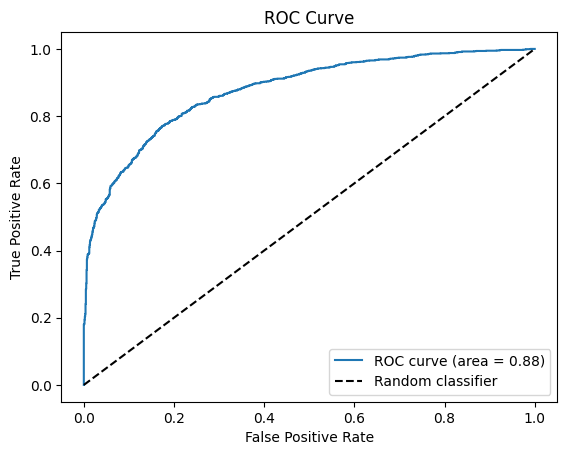

In [110]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()


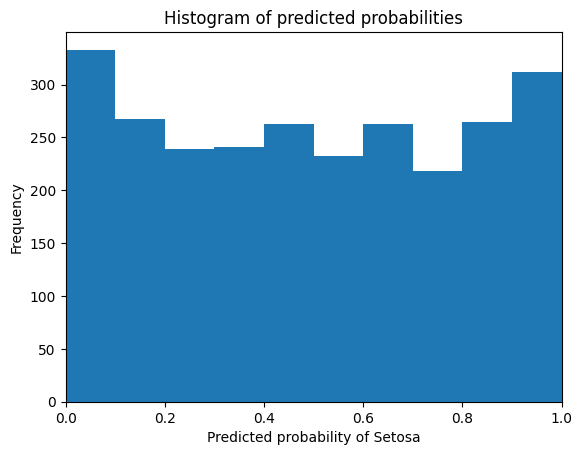

In [111]:
# Plot the predicted class probabilities 
plt.hist(y_pred_prob, bins=10) 
plt.xlim(0, 1) 
plt.title('Histogram of predicted probabilities') 
plt.xlabel('Predicted probability of Setosa') 
plt.ylabel('Frequency') 
plt.show() 


check various types of models

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# importing model evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [114]:
# List of classifiers to test
classifiers = [
('Decision Tree', DecisionTreeClassifier()),
('Random Forest', RandomForestClassifier()),
('KNN', KNeighborsClassifier(n_neighbors=5)),
('Gaussion NB',GaussianNB()),
('LogisticRegression', LogisticRegression())
]

In [115]:
for clf_name, clf in classifiers:
# Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()


    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.7143
Average Precision: 0.7148
Average Recall: 0.7153
-----------------------
Classifier: Random Forest
Average Accuracy: 0.7843
Average Precision: 0.7797
Average Recall: 0.7793
-----------------------
Classifier: KNN
Average Accuracy: 0.6591
Average Precision: 0.6612
Average Recall: 0.6590
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.4991
Average Precision: 0.4780
Average Recall: 0.4982
-----------------------
Classifier: LogisticRegression
Average Accuracy: 0.6264
Average Precision: 0.6315
Average Recall: 0.6266
-----------------------


In [116]:
import seaborn as sns

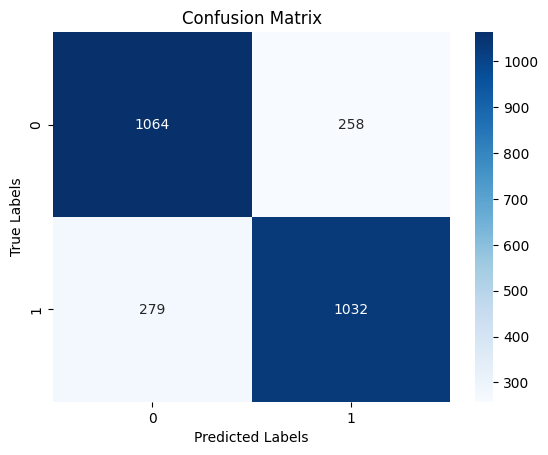

In [117]:
# making predictions on the test dataset
y_test_pred = rf.predict(X_test)

# evaluating model through a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [118]:
df_final.columns

Index(['sex', 'viloyat_id', 'tuman_id', 'mfy_id', 'client_type', 'job_name',
       'salary', 'total_client_family_salary', 'occupation_status',
       'family_status', 'family_members_count', 'home_type', 'home_owner',
       'client_monthly_expenditure', 'product_price', 'final_produt_price',
       'status'],
      dtype='object')